# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
from webdriver_manager.chrome import ChromeDriverManager
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html). Inspect the page to identify which elements to scrape. Note that the URL is `https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html`.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)
html = browser.html

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data
table = soup.find('table', class_='table')

rows = table.find_all('tr', class_='data-row')


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
# Loop through the scraped data to create a list of rows
for row in rows:
    print(row)

<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<td>-77.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>79</td>
<td>2012-08-23</td>
<td>17</td>
<td>159</td>
<td>6</td>
<td>-76.0</td>
<td>742.0</td>

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
#column_names = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
df = pd.DataFrame(columns =['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'])

for row in rows:
        data = row.find_all('td')
        row_data=[td.text.strip() for td in data]
        lenghth=len(df)
        df.loc[lenghth]=row_data

In [8]:
# Confirm DataFrame was created successfully
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [10]:
# Change data types for data analysis
df['id']=df['id'].astype(int)
df['terrestrial_date']=pd.to_datetime(df['terrestrial_date'])
df['sol']=df['sol'].astype(int)
df['ls']=df['ls'].astype(int)
df['month']=df['month'].astype(int)
df['min_temp']=df['min_temp'].astype(float)
df['pressure']=df['pressure'].astype(float)


In [11]:
# Confirm type changes were successful by examining data types again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int64         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 116.7 KB


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [24]:
# 1. How many months are there on Mars?
months = df['month'].nunique()
months

12

In [26]:
# 2. How many Martian days' worth of data are there?
mart_days = df['sol'].max()
mart_days

1977

In [37]:
# 3. What is the average low temperature by month?

#Create KVP python list to hold month (by number) and its avg min temp
avg_min_temp=[]

#for loop to get data
for i in range(1,months +1):
    
    # month (by number) and its avg min temp
    weather_month={"month_num":"","avg_min_temp":""}
    
    avg_min_month=df.loc[df['month']==i]['min_temp'].mean()
    round_avg_min_month = round(avg_min_month,0)
    
    weather_month["month_num"] = i
    weather_month["avg_min_temp"] = round_avg_min_month
    
    avg_min_temp.append(weather_month)    

print(avg_min_temp)


[{'month_num': 1, 'avg_min_temp': -77.0}, {'month_num': 2, 'avg_min_temp': -80.0}, {'month_num': 3, 'avg_min_temp': -83.0}, {'month_num': 4, 'avg_min_temp': -83.0}, {'month_num': 5, 'avg_min_temp': -79.0}, {'month_num': 6, 'avg_min_temp': -75.0}, {'month_num': 7, 'avg_min_temp': -72.0}, {'month_num': 8, 'avg_min_temp': -68.0}, {'month_num': 9, 'avg_min_temp': -69.0}, {'month_num': 10, 'avg_min_temp': -72.0}, {'month_num': 11, 'avg_min_temp': -72.0}, {'month_num': 12, 'avg_min_temp': -74.0}]


In [42]:
#new DF from pyhton list
#set index as month num to get rid of pythons 0 index... less confusing to find months
df_month_temp = pd.DataFrame(avg_min_temp).set_index("month_num")
df_month_temp

,avg_min_temp
month_num,
1,-77.0
2,-80.0
3,-83.0
4,-83.0
5,-79.0
6,-75.0
7,-72.0
8,-68.0
9,-69.0


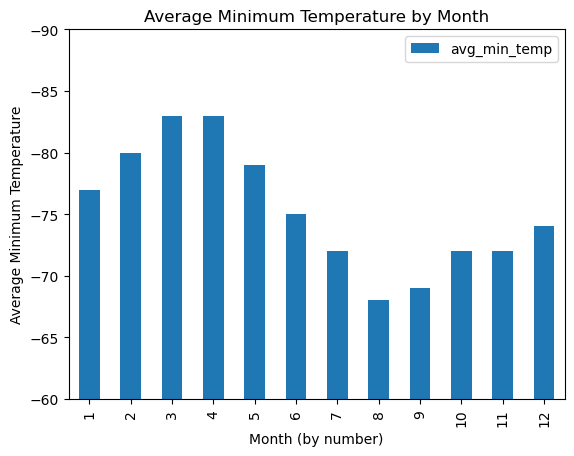

In [53]:
# Plot the average temperature by month
df_month_temp.plot(kind="bar")

# Titles and axis
plt.title('Average Minimum Temperature by Month')
plt.xlabel("Month (by number)")
plt.ylabel("Average Minimum Temperature")

plt.ylim([-60, -90])


plt.show()

In [16]:
# Identify the coldest and hottest months in Curiosity's location

# The hottest Months are 3 & 4
# The coldest Month is 8

#show this in code with min and max??

In [54]:
# 4. Average pressure by Martian month

df_group_month=df.groupby('month')

df_month_press=df_group_month.mean().loc[:,['pressure']]
df_month_press


/var/folders/4l/8gsgh5l12wgfd7nl1f5cykh00000gn/T/ipykernel_63626/2043556980.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_month_press=df_group_month.mean().loc[:,['pressure']]


,pressure
month,
1,862.488506
2,889.455056
3,877.322917
4,806.329897
5,748.557047
6,745.054422
7,795.105634
8,873.829787
9,913.305970


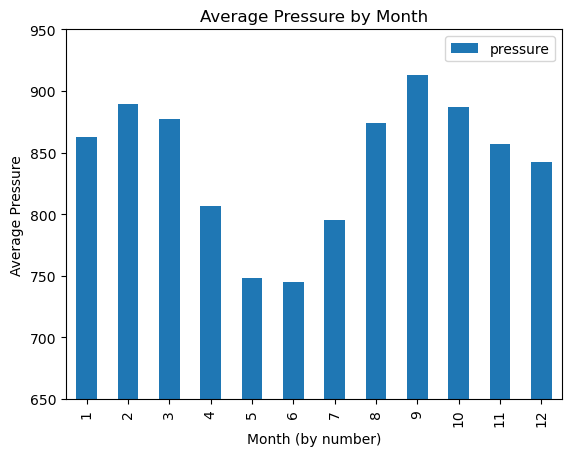

In [60]:
# Plot the average pressure by month

df_month_press.plot(kind="bar")

plt.title('Average Pressure by Month')
plt.xlabel("Month (by number)")
plt.ylabel("Average Pressure")

plt.ylim(650,950)

plt.show()

In [ ]:
#The lowest month is 6 (june) and the highest is 9 (september)

#Show code??


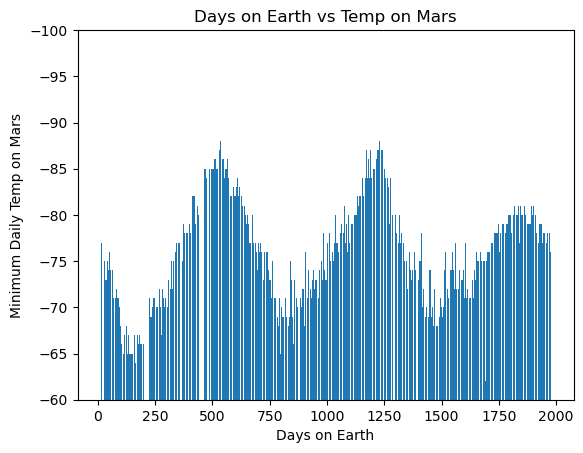

In [63]:
# 5. How many terrestrial (earth) days are there in a Martian year?
#checking temperature to gauge a turn of the sun and compare to earth days

plt.bar(df['sol'],df['min_temp'])

# Titles and axis
plt.title('Days on Earth vs Temp on Mars')
plt.xlabel("Days on Earth")
plt.ylabel("Minimum Daily Temp on Mars")

plt.ylim(-60,-100)

plt.show()


In [ ]:
#If we subtract the approx peak of cold temp from the one to the other on mars to find za martian year and to determine the amount of days that have passed on earth

#coldest (lowest) points on plot of 1450 - 780 = 670

# Approx 670 earth days go by in a Martian year :)



On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [20]:
# Write the data to a CSV
df.to_csv('mars_data.csv',index=False)

In [21]:
browser.quit()